# Analyse Chainer CIFAR100 performance ofeach layer type

### Inspect timings in chainer_debug.log

In [65]:
%matplotlib inline
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os.path
import datetime
from cycler import cycler
import pandas as pd

In [148]:
!ls *.log

chainer_timings_K80_b128e1.log   chainer_timings_mouse_b128e1.log
chainer_timings_k80_b64e1.log    chainer_timings_mouse_b64e1.log


In [158]:
filename1="chainer_timings_k80_b128e1.log"
print "Reading",filename1
log_data1 = pd.read_csv(filename1,header=[0], skiprows=[0])
log_data1.iloc[:5]

Reading chainer_timings_k80_b128e1.log


,time1,time2,time3,Input,Class
0,0.000096,0.471348,0.000074,[128: 64],Convolution2DFunction
1,0.000045,0.000355,0.000044,[128: 64: 64],BatchNormalization
2,0.000026,0.002121,0.000041,[128],ReLU
3,0.000024,0.003328,0.000042,[128],Dropout
4,0.000029,0.000330,0.000037,[128: 64],Convolution2DFunction


In [159]:
filename2="chainer_timings_k80_b64e1.log"
print "Reading",filename2
log_data2 = pd.read_csv(filename2,header=[0], skiprows=[0])
log_data2.iloc[:5]

Reading chainer_timings_k80_b64e1.log


,time1,time2,time3,Input,Class
0,0.000128,0.470475,0.000076,[64: 64],Convolution2DFunction
1,0.000046,0.000370,0.000041,[64: 64: 64],BatchNormalization
2,0.000027,0.002133,0.000040,[64],ReLU
3,0.000024,0.003302,0.000039,[64],Dropout
4,0.000028,0.000324,0.000038,[64: 64],Convolution2DFunction


In [160]:
data1=log_data1.copy()
data1.drop(data1.columns[[3]],axis=1,inplace=True)
print data1["Class"].unique()

data2=log_data2.copy()
data2.drop(data2.columns[[3]],axis=1,inplace=True)
print data2["Class"].unique()

['Convolution2DFunction' 'BatchNormalization' 'ReLU' 'Dropout'
 'MaxPooling2D' 'Reshape' 'LinearFunction' 'FunctionAdapter' 'Transpose'
 'DropoutGrad' 'ReLUGrad2' 'MaxPooling2DGrad' 'Deconvolution2DFunction'
 'Convolution2DGradW' 'FixedBatchNormalization']
['Convolution2DFunction' 'BatchNormalization' 'ReLU' 'Dropout'
 'MaxPooling2D' 'Reshape' 'LinearFunction' 'FunctionAdapter' 'Transpose'
 'DropoutGrad' 'ReLUGrad2' 'MaxPooling2DGrad' 'Deconvolution2DFunction'
 'Convolution2DGradW' 'FixedBatchNormalization']


In [161]:
summed1=data1.groupby("Class").agg("sum")
summed2=data2.groupby("Class").agg("sum")


Text(0.5,1,u'chainer_timings_k80_b64e1.log')

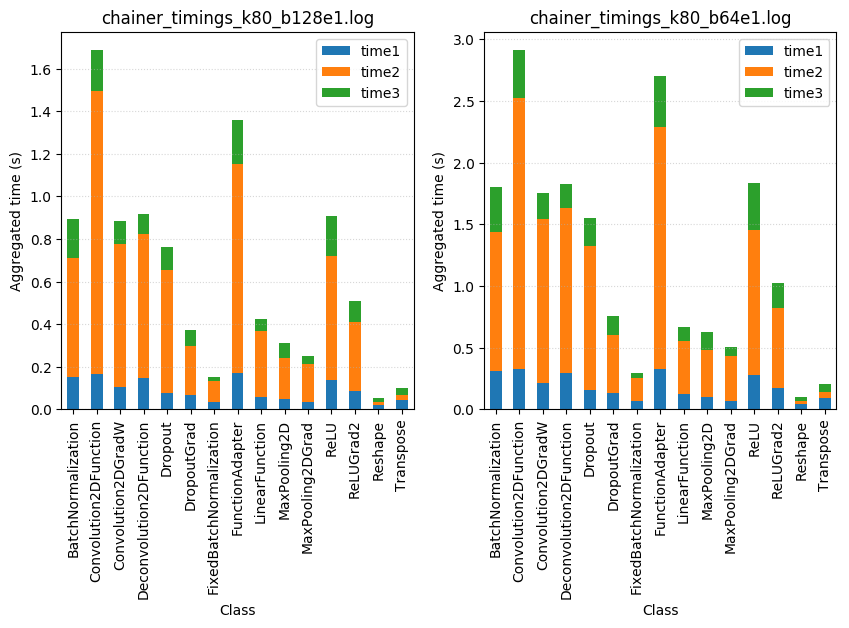

In [162]:
plt.rcParams['figure.figsize'] = 10,5 
fig, axarr = plt.subplots(1,2)
summed1.plot(kind="bar",stacked=True,ax=axarr[0])
summed2.plot(kind="bar",stacked=True,ax=axarr[1])
for ax in axarr:
    ax.yaxis.grid('on', alpha=0.5, ls=":" )
    ax.set_ylabel("Aggregated time (s)")
    
axarr[0].set_title(filename1)
axarr[1].set_title(filename2)

In [154]:
print "sum1=",summed1.sum().sum()
print "sum2=",summed2.sum().sum()

sum1= 5.947824
sum2= 11.127512
